In [1]:
import numpy as np
import matplotlib.pyplot as plt
import sys
import os 

In [2]:
sys.path.insert(0,'../scripts/Images_generation/')
from images_generator import image_generator_sim, image_generator_real
from images_utils import get_data, shift_gal, peak_detection, draw_images
import cosmos_params

sys.path.insert(0,'../scripts/tools_generation/')
from tools_generation import utils, plot

***
**Note:**

Images simulated in this notebook are drawn supposing a number of exposures corresponding to the **full LSST and Euclid surveys**. There is just one PSF applied on the stack.

If you want to generate images for one single exposure, go to the file `cosmos_param.py` and change the `full_or_single` parameter to `'single'`.

***

# Image generation using parametric models (i.e. simulations)

## Generate image of isolated galaxies with brightest centered

In [3]:
case = 'centered' # centered/ miscentered_0.1/ miscentered_peak/ 
gal_type = 'simulation' #simulation or real/
training_or_test = 'test' # training test validation
isolated_or_blended = 'isolated' #isolated blended
method_shift = 'noshift' # noshift uniform uniform+betaprime
do_peak_detection = False
N_files = 1 # Nb of files to generate
N_per_file = 1 # Number of galaxies per file
nmax_blend = 1 # Number of galaxies on an image if integer, or interval for sampling if tuple
assert training_or_test in ['training', 'validation', 'test']

# Fixed parameters:
max_try = 100 # maximum number of try before leaving the function (to avoir infinite loop)
mag_cut = 27.5 # magnitude cut
max_stamp_size = 64 # Size of patch to generate
center_brightest = True # Center the brightest galaxy (i.e. the galaxy with the highest magnitude)
# If center_brightest = False : choose with method to use to shift the brightest
method_shift_brightest = 'uniform'
# And then you need to choose the method to shift the other galaxies as a function of the position of the brightest on the image
method_shift_others = 'uniform'
max_dx = 3.2 #in arcseconds, limit to use for uniform shifting: the center of the shifted galaxy will be shifted from the center or from the brightest galaxy from a random number between [-max_dx ; max_dx] arcsecond
max_r = 2. #in arcseconds, limit to use for annulus shifting: galaxy is shifted in an annulus around the center of the image or of the brightest galaxy which has for minimum radius fwhm_lsst/2 and for maximum radius max_r


In [4]:
# Index to use
used_idx = np.arange(5000)
# Catalog path
cosmos_cat_dir = '/sps/lsst/users/barcelin/COSMOS_25.2_training_sample'

In [5]:
res = image_generator_sim(cosmos_cat_dir, training_or_test, isolated_or_blended, used_idx, nmax_blend, max_try, mag_cut, method_shift_brightest, method_shift_others, max_dx, max_r, do_peak_detection, center_brightest, max_stamp_size)

In [6]:
res[2]

{'redshift_0': 0.3686999976634979,
 'moment_sigma_0': 1.89266037940979,
 'e1_0': -0.019270464777946472,
 'e2_0': 0.10299094766378403,
 'mag_0': 26.523095669802217,
 'nb_blended_gal': 1,
 'mag': 26.523095669802217,
 'mag_ir': -0.3611612185932698,
 'closest_mag': nan,
 'closest_mag_ir': nan,
 'closest_x': nan,
 'closest_y': nan,
 'idx_closest_to_peak': 0,
 'n_peak_detected': 1,
 'SNR': 55.05999693011429,
 'SNR_peak': 0.063659530514717}

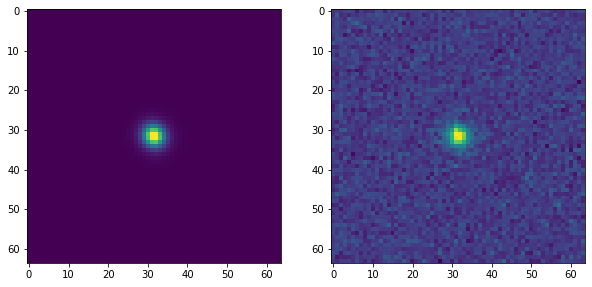

In [7]:
fig, ax = plt.subplots(1,2, figsize =(10,5))
ax[0].imshow(res[0][6])
ax[1].imshow(res[1][6])

## Generate image of blended galaxies without brightest centered

In [8]:
case = 'centered' # centered/ miscentered_0.1/ miscentered_peak/ 
gal_type = 'simulation' #simulation or real/
training_or_test = 'test' # training test validation
isolated_or_blended = 'blended' #isolated blended
method_shift = 'uniform' # noshift uniform uniform+betaprime
do_peak_detection = False
N_files = 1 # Nb of files to generate
N_per_file = 1 # Number of galaxies per file
nmax_blend = 6 # Number of galaxies on an image if integer, or interval for sampling if tuple
assert training_or_test in ['training', 'validation', 'test']

# Fixed parameters:
max_try = 100 # maximum number of try before leaving the function (to avoir infinite loop)
mag_cut = 27.5 # magnitude cut
max_stamp_size = 64 # Size of patch to generate
center_brightest = True # Center the brightest galaxy (i.e. the galaxy with the highest magnitude)
# If center_brightest = False : choose with method to use to shift the brightest
method_shift_brightest = 'uniform'
# And then you need to choose the method to shift the other galaxies as a function of the position of the brightest on the image
method_shift_others = 'uniform'
max_dx = 3.2 #in arcseconds, limit to use for uniform shifting: the center of the shifted galaxy will be shifted from the center or from the brightest galaxy from a random number between [-max_dx ; max_dx] arcsecond
max_r = 2. #in arcseconds, limit to use for annulus shifting: galaxy is shifted in an annulus around the center of the image or of the brightest galaxy which has for minimum radius fwhm_lsst/2 and for maximum radius max_r


In [9]:
# Index to use
used_idx = np.arange(5000)
# Catalog path
cosmos_cat_dir = '/sps/lsst/users/barcelin/COSMOS_25.2_training_sample'

In [10]:
res = image_generator_sim(cosmos_cat_dir, training_or_test, isolated_or_blended, used_idx, nmax_blend, max_try, mag_cut, method_shift_brightest, method_shift_others, max_dx, max_r, do_peak_detection, center_brightest)

In [11]:
res[2]

{'redshift_0': 0.3327000141143799,
 'moment_sigma_0': 1.8968255519866943,
 'e1_0': -0.338594526052475,
 'e2_0': 0.2170104831457138,
 'mag_0': 26.49837417507758,
 'redshift_1': 0.9136999845504761,
 'moment_sigma_1': 2.0773279666900635,
 'e1_1': 0.6179482936859131,
 'e2_1': -0.7891055345535278,
 'mag_1': 27.048098585436513,
 'redshift_2': 1.1741000413894653,
 'moment_sigma_2': 2.0789802074432373,
 'e1_2': 0.22906148433685303,
 'e2_2': 0.008622313849627972,
 'mag_2': 26.9821670626204,
 'redshift_3': 0.2831999957561493,
 'moment_sigma_3': 2.434058904647827,
 'e1_3': -0.41676560044288635,
 'e2_3': 0.10497880727052689,
 'mag_3': 24.335281350418082,
 'redshift_4': 0.22380000352859497,
 'moment_sigma_4': 2.40203595161438,
 'e1_4': 0.19744087755680084,
 'e2_4': 0.801546573638916,
 'mag_4': 22.91223797010271,
 'redshift_5': 0.7059000134468079,
 'moment_sigma_5': 1.9919769763946533,
 'e1_5': 0.0178480613976717,
 'e2_5': -0.27123814821243286,
 'mag_5': 26.891123478265936,
 'nb_blended_gal': 6,
 'm

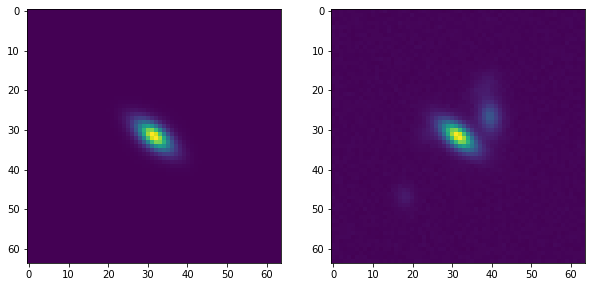

In [12]:
fig, ax = plt.subplots(1,2, figsize =(10,5))
ax[0].imshow(res[0][6])
ax[1].imshow(res[1][6])

Now if I want an image with a variable number of galaxies, say between 2 and 5, I need to set the `nmax_blend` parameter to (2,5).

In [13]:
nmax_blend = (2,5) # Give an interval to sample the number of galaxies to add in this interval

In [14]:
res = image_generator_sim(cosmos_cat_dir, training_or_test, isolated_or_blended, used_idx, nmax_blend, max_try, mag_cut, method_shift_brightest, method_shift_others, max_dx, max_r, do_peak_detection, center_brightest)

In [15]:
res[2]

{'redshift_0': 3.782900094985962,
 'moment_sigma_0': 1.7969186305999756,
 'e1_0': -0.12721870839595795,
 'e2_0': 0.0890030786395073,
 'mag_0': 27.080148040842282,
 'redshift_1': 0.7508999705314636,
 'moment_sigma_1': 2.846771001815796,
 'e1_1': -0.20190489292144775,
 'e2_1': -0.043132584542036057,
 'mag_1': 25.56968436247096,
 'redshift_2': 10.0,
 'moment_sigma_2': 10.0,
 'e1_2': 10.0,
 'e2_2': 10.0,
 'mag_2': 10.0,
 'redshift_3': 10.0,
 'moment_sigma_3': 10.0,
 'e1_3': 10.0,
 'e2_3': 10.0,
 'mag_3': 10.0,
 'redshift_4': 10.0,
 'moment_sigma_4': 10.0,
 'e1_4': 10.0,
 'e2_4': 10.0,
 'mag_4': 10.0,
 'nb_blended_gal': 2,
 'mag': 25.56968436247096,
 'mag_ir': -2.111253006320764,
 'closest_mag': 27.080148040842282,
 'closest_mag_ir': -0.33364972510150803,
 'closest_x': -0.5077414206196726,
 'closest_y': 2.068070250249799,
 'idx_closest_to_peak': 0,
 'n_peak_detected': 1,
 'SNR': 89.33203328460486,
 'SNR_peak': 0.07258882659413424}

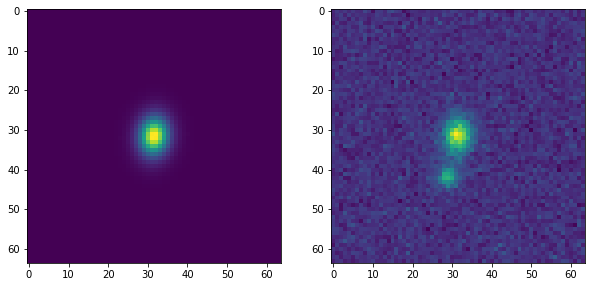

In [16]:
fig, ax = plt.subplots(1,2, figsize =(10,5))
ax[0].imshow(res[0][6])
ax[1].imshow(res[1][6])

# Image generation using real galaxy images (brightest not centered)

A small correlated noise is observed on these 'denoised' real images. 
A procedure exists in GalSim to whiten the noise but is still not functionning yet. An issue is opened about this: https://github.com/GalSim-developers/GalSim/issues/1071


Important: If the parameter `center_brightest` is set to `False`, the brightest galaxy is not centered any more but also the first parameters at rank 0 in the data do not refer to the brightest galaxy any more. It is the case when `center_brightest` is set to `True`.

## Generate image of isolated galaxies

In [17]:
case = 'centered' # centered/ miscentered_0.1/ miscentered_peak/ 
gal_type = 'real' #simulation or real/
training_or_test = 'test' # training test validation
isolated_or_blended = 'isolated' #isolated blended
method_shift = 'noshift' # noshift uniform uniform+betaprime
do_peak_detection = False
N_files = 1 # Nb of files to generate
N_per_file = 1 # Number of galaxies per file
nmax_blend = 1 # Number of galaxies on an image if integer, or interval for sampling if tuple
assert training_or_test in ['training', 'validation', 'test']

# Fixed parameters:
max_try = 100 # maximum number of try before leaving the function (to avoir infinite loop)
mag_cut = 26. # magnitude cut
max_stamp_size = 64 # Size of patch to generate
center_brightest = False # Center the brightest galaxy (i.e. the galaxy with the highest magnitude)
# If center_brightest = False : choose with method to use to shift the brightest
method_shift_brightest = 'uniform'
# And then you need to choose the method to shift the other galaxies as a function of the position of the brightest on the image
method_shift_others = 'uniform'
max_dx = 3.2 #in arcseconds, limit to use for uniform shifting: the center of the shifted galaxy will be shifted from the center or from the brightest galaxy from a random number between [-max_dx ; max_dx] arcsecond
max_r = 2. #in arcseconds, limit to use for annulus shifting: galaxy is shifted in an annulus around the center of the image or of the brightest galaxy which has for minimum radius fwhm_lsst/2 and for maximum radius max_r

In [18]:
# Index to use
used_idx = np.arange(5000)
# Catalog path
cosmos_cat_dir = '/sps/lsst/users/barcelin/COSMOS_25.2_training_sample'

In [19]:
res = image_generator_real(cosmos_cat_dir, training_or_test, isolated_or_blended, used_idx, nmax_blend, max_try, mag_cut, method_shift_brightest, method_shift_others, max_dx, max_r, do_peak_detection, center_brightest, max_stamp_size)

In [20]:
res[2]

{'mag_0': 25.6021801093165,
 'redshift_0': 0.0,
 'moment_sigma_0': 1.6535238027572632,
 'e1_0': -0.24725215137004852,
 'e2_0': 0.05171246826648712,
 'nb_blended_gal': 1,
 'mag': 25.6021801093165,
 'mag_ir': -2.598505935025182,
 'closest_mag': nan,
 'closest_mag_ir': nan,
 'closest_x': nan,
 'closest_y': nan,
 'idx_closest_to_peak': 0,
 'n_peak_detected': 1,
 'SNR': 147.79378703317047,
 'SNR_peak': 0.206243612754862}

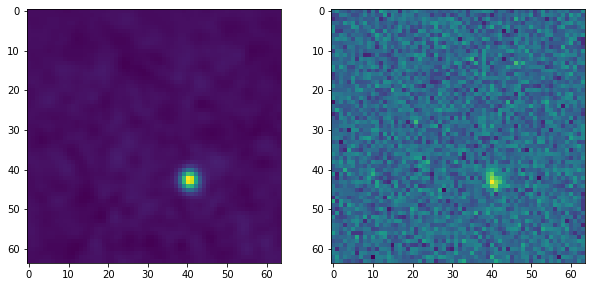

In [21]:
fig, ax = plt.subplots(1,2, figsize =(10,5))
ax[0].imshow(res[0][6])
ax[1].imshow(res[1][6])

## Generate image of blended galaxies

In [22]:
case = 'centered' # centered/ miscentered_0.1/ miscentered_peak/ 
gal_type = 'real' #simulation or real/
training_or_test = 'test' # training test validation
isolated_or_blended = 'blended' #isolated blended
method_shift = 'uniform' # noshift uniform uniform+betaprime
do_peak_detection = False
N_files = 1 # Nb of files to generate
N_per_file = 1 # Number of galaxies per file
nmax_blend = 6 # Number of galaxies on an image if integer, or interval for sampling if tuple
assert training_or_test in ['training', 'validation', 'test']

# Fixed parameters:
max_try = 100 # maximum number of try before leaving the function (to avoir infinite loop)
mag_cut = 26 # magnitude cut
max_stamp_size = 64 # Size of patch to generate
center_brightest = True # Center the brightest galaxy (i.e. the galaxy with the highest magnitude)
# If center_brightest = False : choose with method to use to shift the brightest
method_shift_brightest = 'uniform'
# And then you need to choose the method to shift the other galaxies as a function of the position of the brightest on the image
method_shift_others = 'annulus'
max_dx = 3.2 #in arcseconds, limit to use for uniform shifting: the center of the shifted galaxy will be shifted from the center or from the brightest galaxy from a random number between [-max_dx ; max_dx] arcsecond
max_r = 4. #in arcseconds, limit to use for annulus shifting: galaxy is shifted in an annulus around the center of the image or of the brightest galaxy which has for minimum radius fwhm_lsst/2 and for maximum radius max_r


In [23]:
# Index to use
used_idx = np.arange(5000)
# Catalog path
cosmos_cat_dir = '/sps/lsst/users/barcelin/COSMOS_25.2_training_sample'

In [24]:
res = image_generator_real(cosmos_cat_dir, training_or_test, isolated_or_blended, used_idx, nmax_blend, max_try, mag_cut, method_shift_brightest, method_shift_others, max_dx, max_r, do_peak_detection, center_brightest, max_stamp_size)

In [25]:
res[2]

{'mag_0': 25.838685415464216,
 'redshift_0': 0.0,
 'moment_sigma_0': 2.855685234069824,
 'e1_0': -0.09204181283712387,
 'e2_0': -0.10145257413387299,
 'mag_1': 25.521063110209727,
 'redshift_1': 0.0,
 'moment_sigma_1': 2.417569875717163,
 'e1_1': 0.1259605586528778,
 'e2_1': 0.3748154938220978,
 'mag_2': 25.55686273343767,
 'redshift_2': 0.0,
 'moment_sigma_2': 2.4970602989196777,
 'e1_2': -0.03667270392179489,
 'e2_2': -0.022839069366455078,
 'mag_3': 25.65825519380218,
 'redshift_3': 0.0,
 'moment_sigma_3': 1.7021750211715698,
 'e1_3': -0.08429184556007385,
 'e2_3': -0.11486571282148361,
 'mag_4': 23.799335150453707,
 'redshift_4': 0.0,
 'moment_sigma_4': 2.41369366645813,
 'e1_4': 0.08397174626588821,
 'e2_4': 0.0187054593116045,
 'mag_5': 24.66794208769614,
 'redshift_5': 0.0,
 'moment_sigma_5': 2.2903215885162354,
 'e1_5': 0.19053921103477478,
 'e2_5': 0.47526606917381287,
 'nb_blended_gal': 6,
 'mag': 23.799335150453707,
 'mag_ir': -3.3704086462903318,
 'closest_mag': 25.52106311

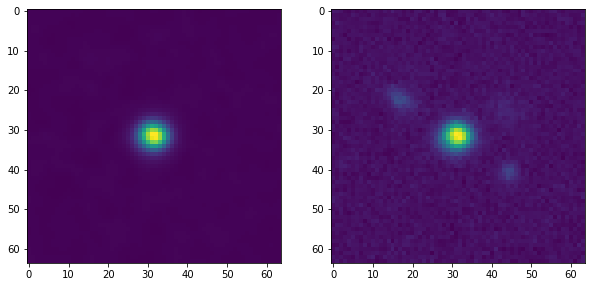

In [26]:
fig, ax = plt.subplots(1,2, figsize =(10,5))
ax[0].imshow(res[0][6])
ax[1].imshow(res[1][6])

# Image generation of field

 51.2 arcseconds of LSST (256x256 pixels, 256 x 0.2 = 51.2 - 0.2 arcsecond/pix is pixel size of LSST data), so shift in 51.2/2 = 25,6 arcseconds.
 
 On these field I add a random number between 32 and 96 galaxies so that, if we generate a lot of these, the mean is at 64 galaxies per patch (mean of galaxies density after 10 years of operation for LSST, https://arxiv.org/pdf/1911.02505.pdf, part 2.4 page 4)

In [27]:
case = 'centered' # centered/ miscentered_0.1/ miscentered_peak/ 
gal_type = 'simulation' #simulation or real/
training_or_test = 'test' # training test validation
isolated_or_blended = 'blended' #isolated blended
method_shift = 'uniform' # noshift uniform uniform+betaprime
do_peak_detection = False
N_files = 1 # Nb of files to generate
N_per_file = 1 # Number of galaxies per file
nmax_blend = (32,96) # Number of galaxies on an image if integer, or interval for sampling if tuple
assert training_or_test in ['training', 'validation', 'test']

# Fixed parameters:
max_try = 100 # maximum number of try before leaving the function (to avoir infinite loop)
mag_cut = 27.5 # magnitude cut
max_stamp_size = 256 # Size of patch to generate
center_brightest = False # Center the brightest galaxy (i.e. the galaxy with the highest magnitude)
# If center_brightest = False : choose with method to use to shift the brightest
method_shift_brightest = 'uniform'
# And then you need to choose the method to shift the other galaxies as a function of the position of the brightest on the image
method_shift_others = 'uniform'
max_dx = 25.6 #in arcseconds, limit to use for uniform shifting: the center of the shifted galaxy will be shifted from the center or from the brightest galaxy from a random number between [-max_dx ; max_dx] arcsecond
max_r = 4. #in arcseconds, limit to use for annulus shifting: galaxy is shifted in an annulus around the center of the image or of the brightest galaxy which has for minimum radius fwhm_lsst/2 and for maximum radius max_r

In [28]:
# Index to use
used_idx = np.arange(5000)
# Catalog path
cosmos_cat_dir = '/sps/lsst/users/barcelin/COSMOS_25.2_training_sample'

## With simulations

In [29]:
res = image_generator_sim(cosmos_cat_dir, training_or_test, isolated_or_blended, used_idx, nmax_blend, max_try, mag_cut, method_shift_brightest, method_shift_others, max_dx, max_r, do_peak_detection, center_brightest, max_stamp_size)

In [30]:
res[2]

{'redshift_0': 0.4284000098705292,
 'moment_sigma_0': 2.457505941390991,
 'e1_0': -0.10657250881195068,
 'e2_0': 0.012995054014027119,
 'mag_0': 25.55686273343767,
 'redshift_1': 0.6463000178337097,
 'moment_sigma_1': 1.7795594930648804,
 'e1_1': -0.5282727479934692,
 'e2_1': -0.28162142634391785,
 'mag_1': 27.136187684073395,
 'redshift_2': 0.6305000185966492,
 'moment_sigma_2': 2.158489465713501,
 'e1_2': -0.6382294297218323,
 'e2_2': -0.13256993889808655,
 'mag_2': 26.46360490517345,
 'redshift_3': 0.8490999937057495,
 'moment_sigma_3': 2.007822275161743,
 'e1_3': -0.5371725559234619,
 'e2_3': -0.11042826622724533,
 'mag_3': 27.461362814413036,
 'redshift_4': 0.7300999760627747,
 'moment_sigma_4': 2.1461029052734375,
 'e1_4': -0.0707787424325943,
 'e2_4': 0.0012876370456069708,
 'mag_4': 24.50604367820737,
 'redshift_5': 0.37459999322891235,
 'moment_sigma_5': 1.792707085609436,
 'e1_5': -0.5984476208686829,
 'e2_5': 0.11871520429849625,
 'mag_5': 27.466330932795714,
 'redshift_6': 

In [31]:
print(str(res[2]['nb_blended_gal'])+' galaxies are added to this image.')

48 galaxies are added to this image.


Here `res[0]` is not very interesting to plot. It is just the first galaxy which was generated, not necessarily the brightest one, as we set the parameter `center_brightest` to `False`.

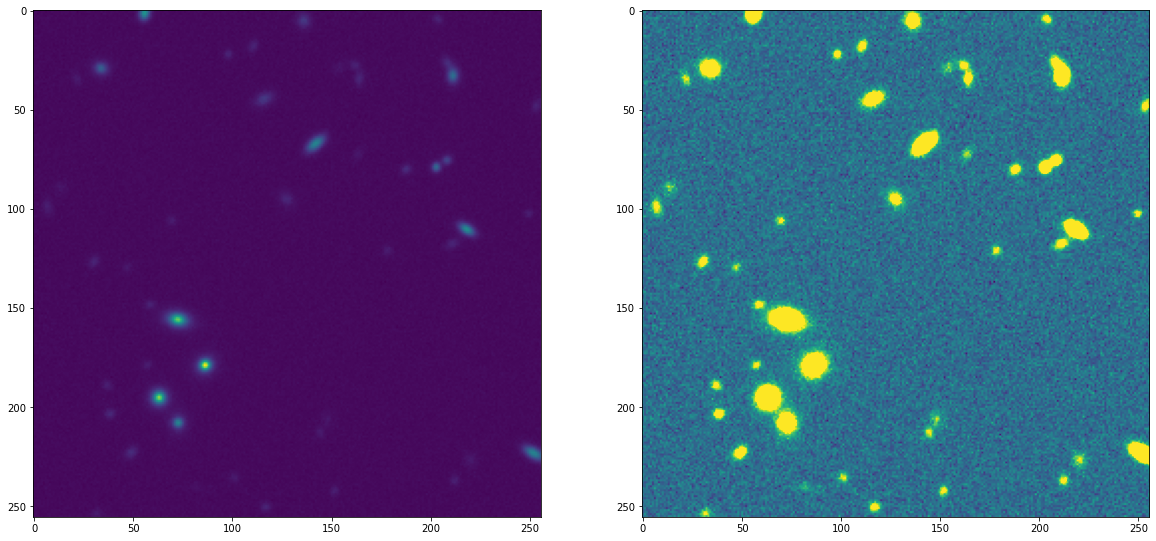

In [32]:
fig, ax = plt.subplots(1,2, figsize =(20,10))
ax[0].imshow(res[1][6])
ax[1].imshow(res[1][6], vmax = 2000)

Use the `plot_rgb` function of the `plot.py` module to show the image in RGB (IRG bands)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


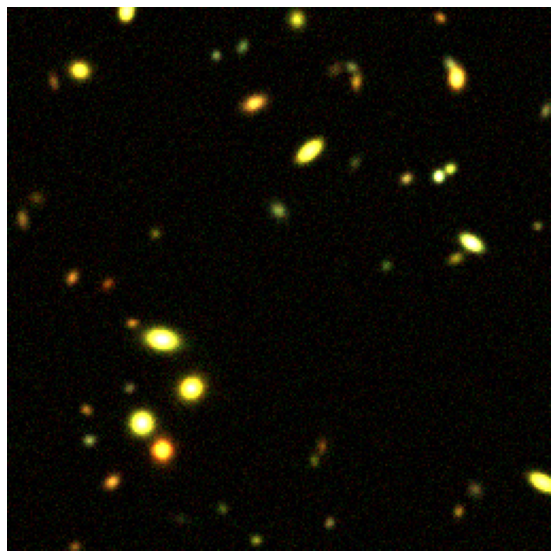

In [33]:
bands = [7,6,5] # Plot ugrizy

fig = plt.figure(figsize = (10,10))

plot.plot_rgb(res[1]/(np.max(res[1][4:])/10), bands = bands,ax= None, band_first = True,zoom = 1, clip = False)

Put a cross on the center of each galaxy with the shift information generated when the image is created.

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


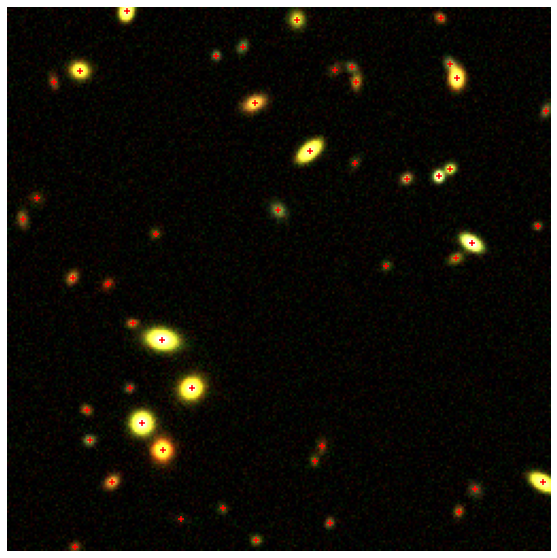

In [34]:
bands = [7,6,5] # Plot ugrizy
pixel_scale_lsst = 0.2 # arcsec/pix
fig = plt.figure(figsize = (10,10))

plot.plot_rgb(res[1]/(np.max(res[1][4:])/10), bands = bands,ax= None, band_first = True,zoom = 1, shifts = res[3]/pixel_scale_lsst, clip = False)

## With real images

In [35]:
case = 'centered' # centered/ miscentered_0.1/ miscentered_peak/ 
gal_type = 'real' #simulation or real/
training_or_test = 'test' # training test validation
isolated_or_blended = 'blended' #isolated blended
method_shift = 'uniform' # noshift uniform uniform+betaprime
do_peak_detection = False
N_files = 1 # Nb of files to generate
N_per_file = 1 # Number of galaxies per file
nmax_blend = (32,96) # Number of galaxies on an image if integer, or interval for sampling if tuple
assert training_or_test in ['training', 'validation', 'test']

# Fixed parameters:
max_try = 100 # maximum number of try before leaving the function (to avoir infinite loop)
mag_cut = 24. # magnitude cut
max_stamp_size = 256 # Size of patch to generate
center_brightest = False # Center the brightest galaxy (i.e. the galaxy with the highest magnitude)
# If center_brightest = False : choose with method to use to shift the brightest
method_shift_brightest = 'uniform'
# And then you need to choose the method to shift the other galaxies as a function of the position of the brightest on the image
method_shift_others = 'uniform'
max_dx = 25.6 #in arcseconds, limit to use for uniform shifting: the center of the shifted galaxy will be shifted from the center or from the brightest galaxy from a random number between [-max_dx ; max_dx] arcsecond
max_r = 4. #in arcseconds, limit to use for annulus shifting: galaxy is shifted in an annulus around the center of the image or of the brightest galaxy which has for minimum radius fwhm_lsst/2 and for maximum radius max_r

In [36]:
# Index to use
used_idx = np.arange(5000)
# Catalog path
cosmos_cat_dir = '/sps/lsst/users/barcelin/COSMOS_25.2_training_sample'

In [ ]:
res = image_generator_real(cosmos_cat_dir, training_or_test, isolated_or_blended, used_idx, nmax_blend, max_try, mag_cut, method_shift_brightest, method_shift_others, max_dx, max_r, do_peak_detection, center_brightest, max_stamp_size)

In [ ]:
res[2]

In [ ]:
print(str(res[2]['nb_blended_gal'])+' galaxies are added to this image.')

In [ ]:
fig, ax = plt.subplots(1,2, figsize =(20,10))
ax[0].imshow(res[0][6])
ax[1].imshow(res[1][6], vmax = 10000)

In [ ]:
bands = [7,6,5] # Plot ugrizy

fig = plt.figure(figsize = (10,10))

plot.plot_rgb(res[1]/(np.max(res[1][4:])/10), bands = bands,ax= None, band_first = True,zoom = 1, clip = False)

In [ ]:
bands = [7,6,5] # Plot ugrizy
pixel_scale_lsst = 0.2 # arcsec/pix
fig = plt.figure(figsize = (10,10))

plot.plot_rgb(res[1]/(np.max(res[1][4:])/10), bands = bands,ax= None, band_first = True,zoom = 1, shifts = res[3]/pixel_scale_lsst, clip = False)